# Explore here

In [15]:
import sys
print(sys.executable)


/home/salvikc/tf-ubuntu/bin/python


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ruta = r"/home/salvikc/salvador_romero_deep_learning/data/data/raw/train"

ds = tf.keras.preprocessing.image_dataset_from_directory(
    ruta,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(200,200)
)
x_train = []
y_train = []
cont = 0
for  batch in ds.take(1):
    images, labels = batch
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)


perros = x_train[y_train==1]
gatos = x_train[y_train==0]


Found 25000 files belonging to 2 classes.


2025-05-21 19:37:45.194222: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


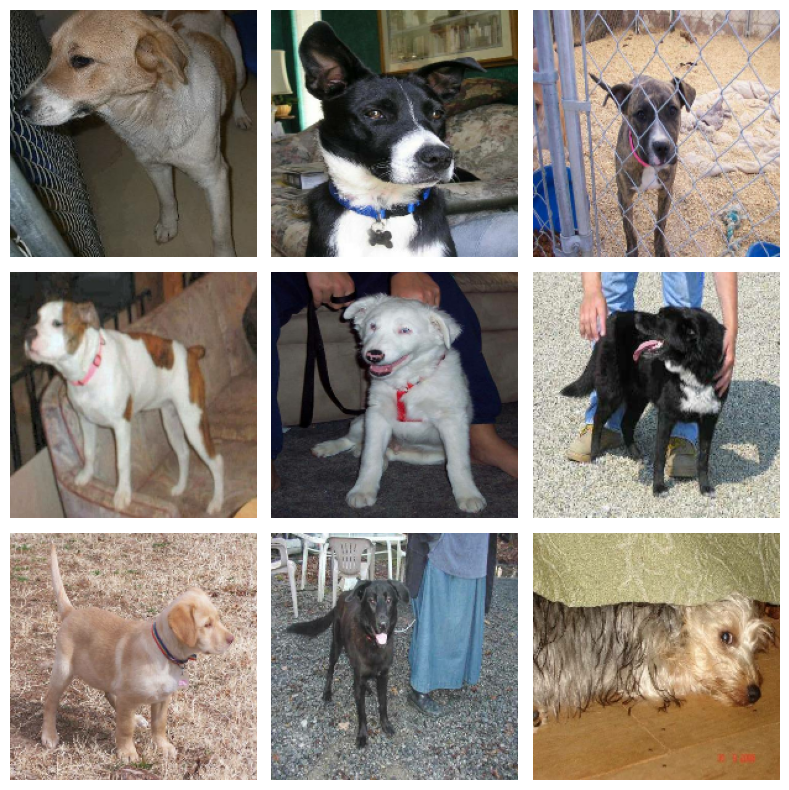

In [3]:

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(perros[i].astype("uint8"))
    plt.axis('off')
plt.tight_layout()
plt.show()



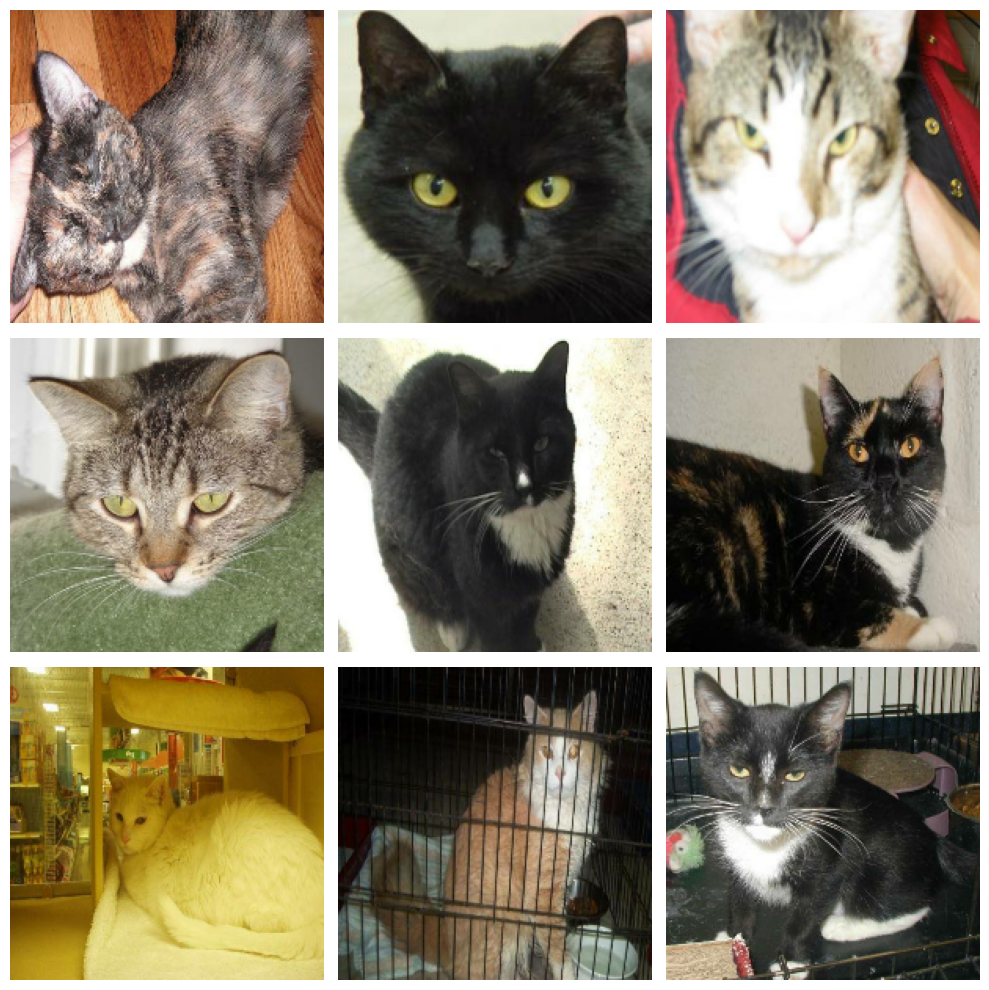

In [4]:

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(gatos[i].astype("uint8"))
    plt.axis('off')
plt.tight_layout()
plt.show()




In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

train_dir = "../data/data/raw/train"

train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rescale=1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (200,200),
    batch_size=32,
    class_mode = 'binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (200,200),
    batch_size=32,
    class_mode = 'binary',
    subset='validation'
)

2025-05-24 20:38:52.579236: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 20:38:52.763648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748111932.829489     752 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748111932.846540     752 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748111932.990277     752 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


**Modelo desde 0**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/home/salvikc/tf-ubuntu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748111938.918411     752 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)




/home/salvikc/tf-ubuntu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1748111943.405387    1022 service.cc:152] XLA service 0x7f921001c6d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748111943.405417    1022 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-24 20:39:03.437975: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748111943.614249    1022 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/625 ━━━━━━━━━━━━━━━━━━━━ 43:04 4s/step - accuracy: 0.5312 - loss: 0.6997

I0000 00:00:1748111946.646844    1022 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5479 - loss: 0.8615

/home/salvikc/tf-ubuntu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 201ms/step - accuracy: 0.5480 - loss: 0.8612 - val_accuracy: 0.6016 - val_loss: 0.7394
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 183ms/step - accuracy: 0.6372 - loss: 0.6420 - val_accuracy: 0.6718 - val_loss: 0.6020
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.6633 - loss: 0.6160 - val_accuracy: 0.6658 - val_loss: 0.5989
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 191ms/step - accuracy: 0.6866 - loss: 0.5910 - val_accuracy: 0.7168 - val_loss: 0.5548
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.7002 - loss: 0.5740 - val_accuracy: 0.7360 - val_loss: 0.5337
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.7216 - loss: 0.5492 - val_accuracy: 0.7178 - val_loss: 0.5493
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 183ms/step - accuracy: 0.7365 - loss: 0.5331 - val_accuracy: 0.7552 - val_loss: 0.5133
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.7429 - loss: 0.51

In [4]:
model.save('../models/modelo_gatos_perros_1.h5')

**Modelo preentrenado**

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False  # Congelamos las capas convolucionales

model_pre = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_pre.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model_pre.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 219ms/step - accuracy: 0.6521 - loss: 0.6156 - val_accuracy: 0.8416 - val_loss: 0.4165
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.8225 - loss: 0.4123 - val_accuracy: 0.8650 - val_loss: 0.3390
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.8608 - loss: 0.3398 - val_accuracy: 0.8710 - val_loss: 0.3063
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.8641 - loss: 0.3179 - val_accuracy: 0.8806 - val_loss: 0.2861
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 120s 191ms/step - accuracy: 0.8737 - loss: 0.2970 - val_accuracy: 0.8842 - val_loss: 0.2730
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 193ms/step - accuracy: 0.8790 - loss: 0.2858 - val_accuracy: 0.8854 - val_loss: 0.2669
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.8880 - loss: 0.2651 - val_accuracy: 0.8842 - val_loss: 0.2670
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.8864 -

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# modelo = load_model('modelo_gatos_perros.h5')

ruta = '../data/data/raw/test1'
imagenes = []
cont_img = 0
for nombre in os.listdir(ruta):
    if nombre.endswith('.jpg') & cont_img<10:
        img = load_img(os.path.join(ruta, nombre), target_size=(200, 200))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # (1, 200, 200, 3)
        img_array = img_array / 255.0
        imagenes.append(img_array)
        cont_img+=1

imagenes = np.stack(imagenes, axis=0)

2025-05-22 12:23:27.510347: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 12:23:27.693124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747909407.765108  343560 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747909407.796448  343560 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747909407.947123  343560 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

modelo1 = load_model('../models/modelo_gatos_perros_1.h5')

ruta = '../data/data/raw/test1'
imagenes = []
cont_img = 0

for nombre in os.listdir(ruta):
    if nombre.endswith('.jpg') and cont_img < 9:
        try:
            img = load_img(os.path.join(ruta, nombre), target_size=(200, 200))
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            imagenes.append(img_array)
            cont_img += 1
        except Exception as e:
            print(f"Error con imagen {nombre}: {e}")

if len(imagenes) > 0:
    imagenes = np.stack(imagenes, axis=0)  # Ahora seguro que no está vacío
    print("Shape final:", imagenes.shape)
else:
    print("No se cargaron imágenes.")


Shape final: (9, 200, 200, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Imagen 1: Perro (score: 0.8883)
Imagen 2: Perro (score: 0.9762)
Imagen 3: Gato (score: 0.2924)
Imagen 4: Perro (score: 0.9990)
Imagen 5: Gato (score: 0.0004)
Imagen 6: Perro (score: 0.9991)
Imagen 7: Gato (score: 0.2736)
Imagen 8: Gato (score: 0.0539)
Imagen 9: Perro (score: 0.7796)


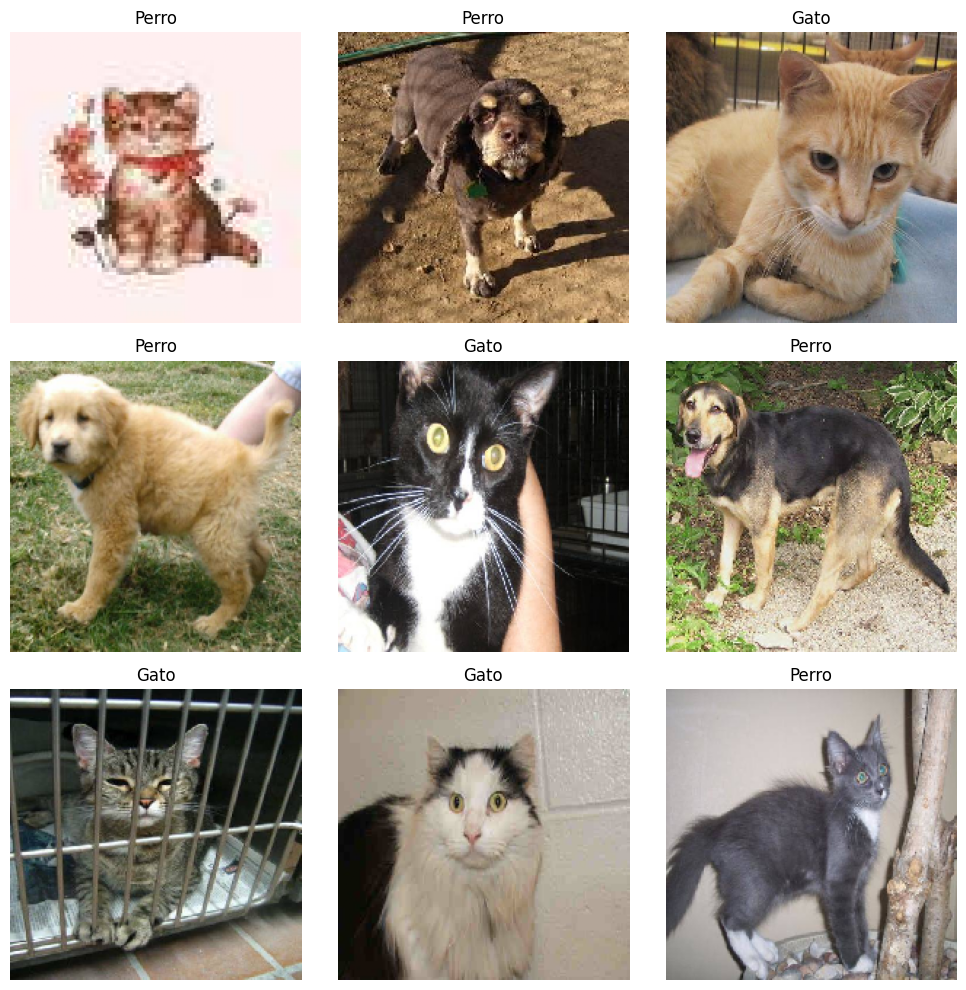

In [10]:
import matplotlib.pyplot as plt
predicciones = modelo1.predict(imagenes)

plt.figure(figsize=(10,10))
for i, pred in enumerate(predicciones):
    clase = "Perro" if pred > 0.5 else "Gato"
    print(f"Imagen {i+1}: {clase} (score: {pred[0]:.4f})")
    plt.subplot(3,3,i+1)
    plt.imshow(imagenes[i])
    plt.title(clase)
    plt.axis('off')
plt.tight_layout()
plt.show()